In [1]:
import numpy as np

optimal_reward_time = np.load("optimal_reward_time_greedy.npy")

In [2]:
optimal_reward_time

array([320.80068475, 292.80895903, 313.89381788, 371.28470491,
       327.81728403, 313.68403748, 368.01826693, 327.17705067,
       345.90400646, 383.71056639, 388.67441167, 312.86391111,
       372.66312252, 368.46708456, 440.40477882, 337.39673462,
       389.31911937, 301.81580707, 353.5603259 , 418.02658626,
       362.32091001, 375.25846296, 320.50959154, 337.04668545,
       283.91538665, 323.23585204, 310.7445436 , 340.00021802,
       427.56040402, 349.99781528, 391.97343634, 392.48907219,
       349.89496169, 319.25613176, 356.58674047, 287.59198054,
       377.91093229, 323.27652005, 353.97609993, 348.91675048,
       314.71456917, 296.27354615, 357.70670559, 349.52676748,
       363.20986062, 271.7025442 , 318.55861958, 354.41666567,
       287.05696256, 323.13011066, 323.74747889, 337.18009818,
       366.60120282, 327.54113266, 358.1958158 , 335.54998332,
       395.54176869, 304.49719481, 279.30711717, 415.32734529,
       358.15600879, 384.90385989, 339.61771246, 283.19

In [3]:
optimal_reward_time_extended = np.concatenate([optimal_reward_time, optimal_reward_time])
optimal_reward_time = optimal_reward_time_extended

In [4]:
import numpy as np
import os

# List of file names
file_paths = [
    "Y_t_exp_time-ada-lasso-stochastic-bandit-under-inter-n20-k14-d120-s10_10times.npy",
    "Y_t_exp_time-lasso-stochastic-bandit-under-interference-n20-k14-d120-s10_10times.npy",
    "Y_t_exp_time-linear-stochastic-bandit-under-interference-n20-k14-d120-s10_10times.npy",
    "Y_t_exp_time-ete-under-interference-n20-k14-d120-s10_10times.npy"
]


# Initialize a dictionary to store the results
cumulative_regret_data = {}

# Process each file
for file_path in file_paths:
    if os.path.exists(file_path):
        # Load the original data (assumed to be 10 runs x T rounds format)
        data = np.load(file_path)  # Shape: (10, T)

        # Calculate instant regret (difference from the constant value)
        instant_regret = np.maximum(optimal_reward_time - data, 0)  # Shape: (10, T)

        # Calculate cumulative regret by taking the cumulative sum along axis=1
        cumulative_regret = np.cumsum(instant_regret, axis=1)  # Shape: (10, T)

        # Store the result
        cumulative_regret_data[file_path] = cumulative_regret

        print(f"Processed file: {file_path}")
    else:
        print(f"File not found: {file_path}")

# Save cumulative regret data as new .npy files
for file_path, cumulative_regret in cumulative_regret_data.items():
    output_file = file_path.replace(".npy", "_cu.npy")
    np.save(output_file, cumulative_regret)
    print(f"Cumulative regret saved to: {output_file}")


File not found: Y_t_exp_time-ada-lasso-stochastic-bandit-under-inter-n20-k14-d120-s10_10times.npy
Processed file: Y_t_exp_time-lasso-stochastic-bandit-under-interference-n20-k14-d120-s10_10times.npy
Processed file: Y_t_exp_time-linear-stochastic-bandit-under-interference-n20-k14-d120-s10_10times.npy
Processed file: Y_t_exp_time-ete-under-interference-n20-k14-d120-s10_10times.npy
Cumulative regret saved to: Y_t_exp_time-lasso-stochastic-bandit-under-interference-n20-k14-d120-s10_10times_cu.npy
Cumulative regret saved to: Y_t_exp_time-linear-stochastic-bandit-under-interference-n20-k14-d120-s10_10times_cu.npy
Cumulative regret saved to: Y_t_exp_time-ete-under-interference-n20-k14-d120-s10_10times_cu.npy


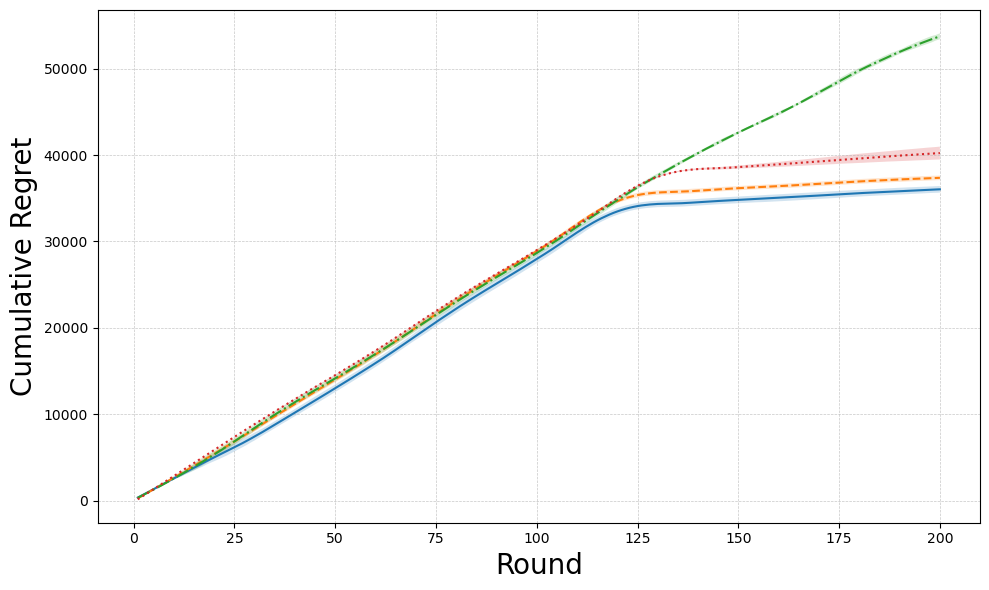

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import savgol_filter

# List of cumulative regret file names and corresponding labels
file_paths = [
    "Y_t_exp_time-ada-lasso-stochastic-bandit-under-inter-n20-k14-d120-s10_10times_cu.npy",
    "Y_t_exp_time-lasso-stochastic-bandit-under-interference-n20-k14-d120-s10_10times_cu.npy",
    "Y_t_exp_time-linear-stochastic-bandit-under-interference-n20-k14-d120-s10_10times_cu.npy",
    "Y_t_exp_time-ete-under-interference-n20-k14-d120-s10_10times_cu.npy"
]

custom_labels = [
    "Adaptive Lasso stochastic bandit",
    "Lasso stochastic bandit",
    "Linear stochastic bandit",
    "EtE bandit"
]

# Define line styles for each label
line_styles = ['-', '--', '-.', ':']  # Solid, dashed, dash-dot, dotted

# Dictionary to store mean and standard deviation
mean_std_data = {}

# Function to read and process each file
def process_files():
    for file_path, label in zip(file_paths, custom_labels):
        if os.path.exists(file_path):
            # Load cumulative regret data (assumed to be 10 runs x T rounds format)
            cumulative_regret = np.load(file_path)  # Shape: (10, T)

            # Compute mean and standard deviation for each round (axis=0)
            mean_data = np.mean(cumulative_regret, axis=0)
            std_data = np.std(cumulative_regret, axis=0)

            # Smooth the data
            window_size = min(35, len(mean_data))
            if window_size % 2 == 0:
                window_size += 1
            poly_order = 2  # Polynomial order
            smoothed_mean_data = savgol_filter(mean_data, window_size, poly_order)

            # Store in the dictionary
            mean_std_data[label] = (smoothed_mean_data, std_data)
        else:
            print(f"File not found: {file_path}")

# Call the processing function
process_files()

# Plot the results
plt.figure(figsize=(10, 6))

# Use line styles for different methods
for (label, (mean_data, std_data)), linestyle in zip(mean_std_data.items(), line_styles):
    time_steps = range(1, len(mean_data) + 1)
    # Plot the mean line with custom linestyle
    plt.plot(time_steps, mean_data, label=label, linestyle=linestyle)
    # Fill the 95% confidence interval
    lower_bound = mean_data - 1.96 * (std_data / np.sqrt(10))  # Assuming 10 runs
    upper_bound = mean_data + 1.96 * (std_data / np.sqrt(10))
    plt.fill_between(time_steps, lower_bound, upper_bound, alpha=0.2)

# Set title and labels
plt.xlabel("Round", fontsize = 20)
plt.ylabel("Cumulative Regret", fontsize = 20)
# plt.title("$n=20, k=14, d=120, s_0=10$")  # LaTeX-style title

# Add grid and legend
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()
